<a href="https://colab.research.google.com/github/aruntakhur/DeepLearning_Aut_2020_IIITDWD/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(60000, 784)
(60000,)
(10000,)
(10000, 784)


In [3]:
import numpy as np

train_filter = np.where((y_train == 0 ) | (y_train == 4))
test_filter = np.where((y_test == 0) | (y_test == 4))

In [4]:
X_train, Y_train = x_train[train_filter], y_train[train_filter]
X_test, Y_test = x_test[test_filter], y_test[test_filter]
Y_train = [1 if x==4 else x for x in Y_train] 
Y_train = np.array(Y_train).reshape(1,-1)
Y_test = [1 if x==4 else x for x in Y_test] 
Y_test = np.array(Y_test).reshape(1,-1)

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11765, 784)
(1, 11765)
(1962, 784)
(1, 1962)


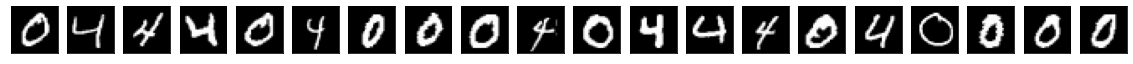

In [6]:
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [7]:
print(len(Y_train[np.where(Y_train==0)]))
print(Y_train[0,15])

5923
1


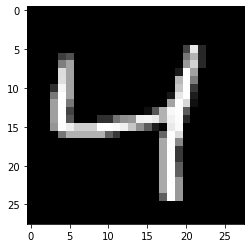

In [8]:
XX_train = X_train.astype('float32') / 255.
XX_test = X_test.astype('float32') / 255.
plt.imshow(XX_train[1].reshape(28,28))

In [9]:
XX_train = XX_train.T
XX_test = XX_test.T
Y_train = Y_train.reshape(1,-1)
Y_test = Y_test.reshape(1,-1)

In [10]:
print(XX_test.shape)

(784, 1962)


In [11]:
def initialize_param(d):
  w = np.zeros((d,1))
  b = 0
  params = {"w": w,"b": b}
  return params


In [12]:
def sigmoid(Z):
      
    A = 1/(1+np.exp(-Z))
       
    return A

In [13]:
def forward(params,X,Y):
  w = params["w"]
  b = params["b"]
  m = X.shape[1]
  A = sigmoid(np.dot(w.T,X) + b)
  cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
  return A,cost

In [14]:
def backprop(X,Y,A):
  m = X.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y).T)
  db = (1 / m) * np.sum(A - Y)

  return dw, db

In [15]:
def optimize(params, X, Y, num_iterations, l_rate):

  w = params["w"]
  b = params["b"]

  costs = []
  for i in range(num_iterations):
    A,cost = forward(params,X,Y)
    dw,db = backprop(X,Y,A)

    params["w"] = params["w"] - l_rate * dw 
    params["b"] = params["b"] - l_rate * db
    if (i%100==0):
      print("Cost on {} iteration: {}",i,cost,np.linalg.norm(dw),db)

    costs.append(cost)
  return params,costs


In [16]:
def predict(params,X):
  w = params["w"]
  print(w.shape,X.shape)
  b = params["b"]
  m = X.shape[1]
  A = sigmoid(np.dot(w.T,X) + b)
  return A

In [17]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
  params = initialize_param(d)
  print(params["w"].shape,"pshape")
  params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
  Y_hat_train = predict(params,XX_train)
  Y_hat_test = predict(params,XX_test)
  
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
  return params,costs



In [18]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 500, 0.005)

(784, 1) pshape
Cost on {} iteration: {} 0 0.6931471805599453 1.568900530685768 0.0034424139396515086
Cost on {} iteration: {} 100 0.2600895441127583 0.5527276590667219 -0.03003821392353082
Cost on {} iteration: {} 200 0.16814482659646032 0.33097917475520705 -0.017945845392873732
Cost on {} iteration: {} 300 0.12870632592946846 0.23755666044382506 -0.013031137101248796
Cost on {} iteration: {} 400 0.10650149183880532 0.18633895581768797 -0.010391681390080607
(784, 1) (784, 11765)
(784, 1) (784, 1962)
train accuracy: 91.87579139596755 %
test accuracy: 92.54075744236887 %
